# Comparing Stock Prices With Company Revenue

In this notebook I will be using Yahoo Finance API to collect data on the historical stock prices of different companies. I will also use the Beautiful Soup library for webscraping to extract data regarding historical revenue for the companies.

I will be comparing the history of two e-commerce companies: Amazon and eBay.

## Data Collection

In [1]:
# Importing the required packages and libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initializer ticker object for amazon
amazon = yf.Ticker("AMZN")

In [3]:
# Obtain the stock prices for each day Amazon was publicly traded and store in pandas dataframe
amazon_data = pd.DataFrame(amazon.history(period = "max"))

# Add an index column 
amazon_data.reset_index(inplace = True)

amazon_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0,0.0


In [4]:
# Make a get request to the website containing data on amazon revenue
r = requests.get(url = "https://www.macrotrends.net/stocks/charts/AMZN/amazon/revenue")

# Store website content in html format 
html_data = r.text

In [5]:
# Parse the html website data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
soup.title

<title>Amazon Revenue 2010-2022 | AMZN | MacroTrends</title>

In [6]:
amazon_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through all the rows of the second table on the website, which contains quarterly data 
for row in soup.find_all("tbody")[1].find_all("tr"):
    # Find all data cells in the row and store the data from each cell
    col = row.find_all('td')
    quarter = col[0].text
    revenue = col[1].text
    # Append each row to a pandas dataframe
    amazon_revenue = amazon_revenue.append({"Date": quarter, "Revenue": revenue}, ignore_index = True)
    
amazon_revenue.head()

,Date,Revenue
0,2022-09-30,"$127,101"
1,2022-06-30,"$121,234"
2,2022-03-31,"$116,444"
3,2021-12-31,"$137,412"
4,2021-09-30,"$110,812"


In [7]:
# Reformat the Revenue column to remove the % and , signs
amazon_revenue["Revenue"] = amazon_revenue['Revenue'].str.replace(',|\$',"")

In [8]:
# Drop any rows containing NaN values
amazon_revenue.dropna(inplace=True)

# Drop any rows containing blank values
amazon_revenue = amazon_revenue[amazon_revenue['Revenue'] != ""]

# Convert the columns to the correct datatypes
amazon_revenue.Date = pd.to_datetime(amazon_revenue.Date)
amazon_revenue.Revenue = pd.to_numeric(amazon_revenue.Revenue)

amazon_revenue.head()

,Date,Revenue
0,2022-09-30,127101
1,2022-06-30,121234
2,2022-03-31,116444
3,2021-12-31,137412
4,2021-09-30,110812


In [9]:
# Initialize the EBay ticker object
ebay = yf.Ticker("EBAY")

In [10]:
# Obtain the stock prices for each day EBay was publicly traded and store in pandas dataframe
ebay_data = pd.DataFrame(ebay.history(period = "max"))

# Insert an index column as date is currently the index
ebay_data.reset_index(inplace = True)
ebay_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1998-09-24,0.884457,0.896857,0.731538,0.783200,518656090,0.0,0.0
1,1998-09-25,0.752203,0.762535,0.679876,0.741870,121255834,0.0,0.0
2,1998-09-28,0.785267,0.841061,0.760469,0.797665,89772883,0.0,0.0
3,1998-09-29,0.816263,0.830729,0.789400,0.807998,39289536,0.0,0.0
4,1998-09-30,0.780100,0.793532,0.715006,0.744969,44113766,0.0,0.0


In [11]:
# Make a get request to the website containing the data on EBay revenue
r = requests.get(url = "https://www.macrotrends.net/stocks/charts/EBAY/ebay/revenue")

# Store the content of the website in html format
html_data = r.text

In [12]:
# Parse the html data using Beautiful Soup into a format we can work with
soup = BeautifulSoup(html_data, "html.parser")

In [13]:
ebay_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

# Loop through all the rows in the second table on the website, which contains quarterly data
for row in soup.find_all("tbody")[1].find_all("tr"):
    # Find all data cells for the given row and store the data
    col = row.find_all("td")
    quarter = col[0].text
    revenue = col[1].text
    # Append the data to a pandas dataframe
    ebay_revenue = ebay_revenue.append({"Date": quarter, "Revenue": revenue}, ignore_index = True)
    


In [14]:
# Remove all $ and , characters from the revenue column
ebay_revenue["Revenue"] = ebay_revenue['Revenue'].str.replace(',|\$',"")

# Remove all rows containing NaN values
ebay_revenue.dropna(inplace=True)

# Remove all rows containing blank values
ebay_revenue = ebay_revenue[ebay_revenue['Revenue'] != ""]

# Convert the columns to the correct datatypes
ebay_revenue.Date = pd.to_datetime(ebay_revenue.Date)
ebay_revenue.Revenue = pd.to_numeric(ebay_revenue.Revenue)

ebay_revenue.head()

,Date,Revenue
0,2022-09-30,2380
1,2022-06-30,2422
2,2022-03-31,2483
3,2021-12-31,2613
4,2021-09-30,2501


Now that all the data for Amazon and EBay's daily stock price and quarterly revenue has been cleaned, I will finish by visualising the data so we can make easy comparisons between the two companies.

## Data Visualisation

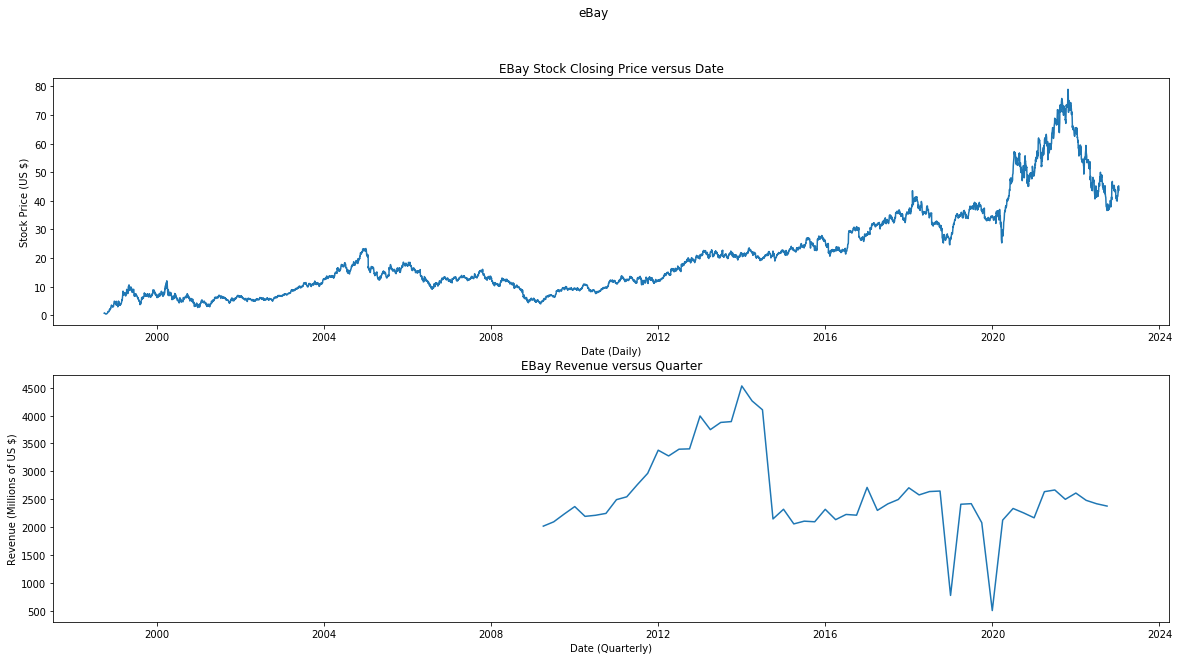

In [15]:
# Create the axes and figure objects and set a title
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
fig.suptitle("eBay")

# Plot the stock price and revenue data against date
ax[0].plot(ebay_data.Date, ebay_data.Close)
ax[1].plot(ebay_revenue.Date, ebay_revenue.Revenue)

# Set the revenue plot to have the same x axis as the stock price plot 
ax[1].set_xlim(ax[0].get_xlim())

# Set axes labels and subplot titles
ax[0].set_title("EBay Stock Closing Price versus Date")
ax[0].set_xlabel("Date (Daily)")
ax[0].set_ylabel("Stock Price (US $)")

ax[1].set_title("EBay Revenue versus Quarter")
ax[1].set_xlabel("Date (Quarterly)")
ax[1].set_ylabel("Revenue (Millions of US $)")


fig.show()

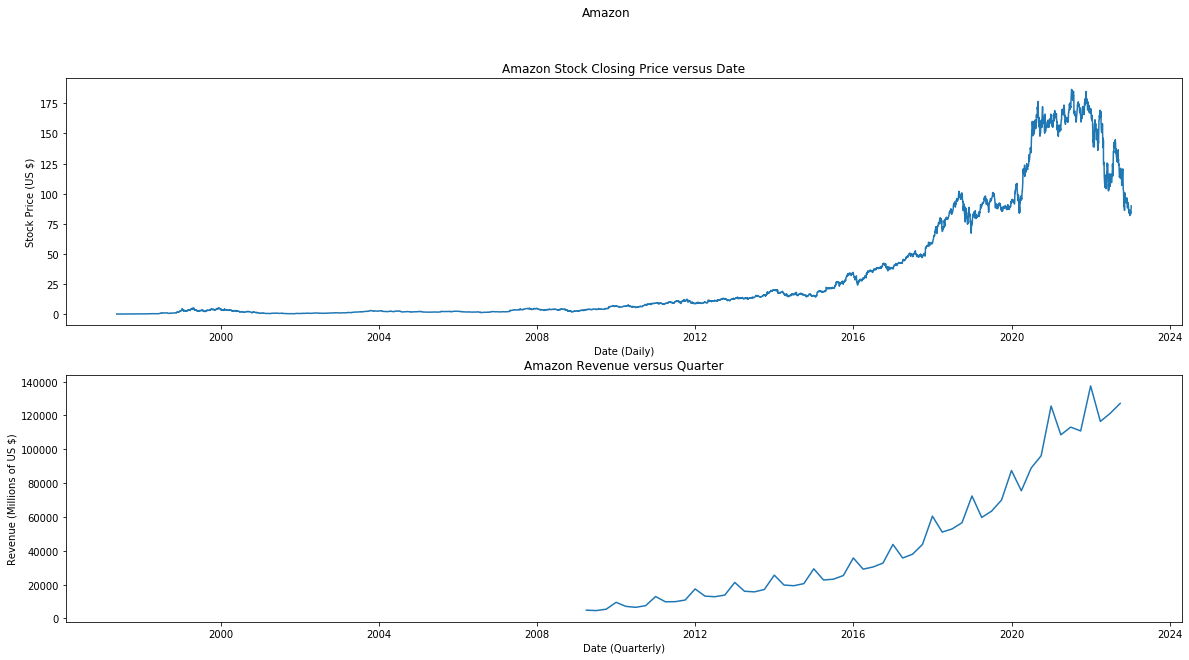

In [16]:
# Create the axes and figure objects and set a title
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
fig.suptitle("Amazon")

# Plot the stock price and revenue data against date
ax[0].plot(amazon_data.Date, amazon_data.Close)
ax[1].plot(amazon_revenue.Date, amazon_revenue.Revenue)

# Set the revenue plot to have the same x axis as the stock price plot 
ax[1].set_xlim(ax[0].get_xlim())

# Set axes labels and subplot titles
ax[0].set_title("Amazon Stock Closing Price versus Date")
ax[0].set_xlabel("Date (Daily)")
ax[0].set_ylabel("Stock Price (US $)")

ax[1].set_title("Amazon Revenue versus Quarter")
ax[1].set_xlabel("Date (Quarterly)")
ax[1].set_ylabel("Revenue (Millions of US $)")


fig.show()

We can see that for Amazon, there is a clear correlation between stock price and revenue. Whereas for eBay, the relationship between stock price and revenue is much more unclear.